In [1]:
# pip install pandas mlxtend

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df = pd.read_excel('retail store.xlsx')
print(df.shape)
df.head(3)

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
df[df.Quantity < 0].head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom


In [5]:
df = df[~df.Quantity < 0]
df.shape

(531285, 8)

In [6]:
df = df[~df.UnitPrice.astype(np.int) < 0]
df.shape

(531283, 8)

In [7]:
counts = df.Country.value_counts()
countries = counts[counts > 5000].index
countries

Index(['United Kingdom', 'Germany', 'France', 'EIRE'], dtype='object')

In [8]:
df = df[df['Country'].isin(countries)]
df.shape

(511628, 8)

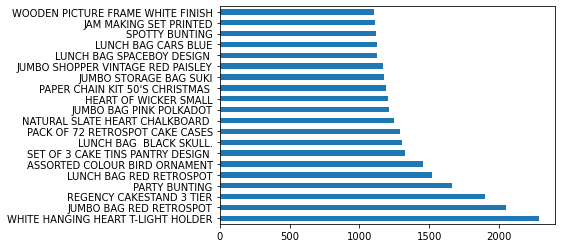

In [9]:
df.Description.value_counts().head(20).plot(kind = "barh")

In [10]:
df_mb = df.groupby(['InvoiceNo', 'Description'])['Quantity']
df_mb = df_mb.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [11]:
df_mb.head(3)

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
max(df_mb.iloc[0].values)

8.0

In [13]:
def make_binary(datapoint):
    return 0 if datapoint <= 0 else 1

df_mb = df_mb.applymap(make_binary)

In [14]:
itemsets = apriori(df_mb, min_support=0.03, use_colnames=True)

In [15]:
rules = association_rules(itemsets, metric="lift", min_threshold=0.5)

In [16]:
rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038233,0.050753,0.031611,0.826793,16.290603,0.029670,5.480420
4,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.050753,0.052667,0.038233,0.753313,14.303326,0.035560,3.840222
5,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.052667,0.050753,0.038233,0.725933,14.303326,0.035560,3.463562
6,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.061669,0.104868,0.041802,0.677852,6.463842,0.035335,2.778638
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.048528,0.051891,0.031455,0.648188,12.491345,0.028937,2.694928
2,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.050753,0.038233,0.031611,0.622834,16.290603,0.029670,2.549983
11,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.059962,0.104868,0.036888,0.615186,5.866266,0.030599,2.326138
1,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.051891,0.048528,0.031455,0.606181,12.491345,0.028937,2.416016
8,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.059600,0.104868,0.034508,0.578993,5.521143,0.028258,2.126168
12,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.064566,0.076931,0.032335,0.500801,6.509743,0.027368,1.849101
